In [ ]:
#IMPORTING THE REQUIRED
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
import keras 

In [ ]:
#LOADING AND SPLITTING THE DATA
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
print('Training Images: {}'.format(X_train.shape))
print('Testing Images: {}'.format(X_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [ ]:
print(X_train[0].shape)

(32, 32, 3)


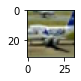

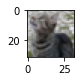

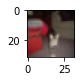

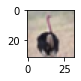

In [ ]:
for i in range(332,336):
    plt.subplot(120+ 1 + i)
    img = X_train[i]
    plt.imshow(img)
    plt.show()

In [ ]:
#PREPROCESSING THE DATA
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


X_train /= 255
X_test=X_test/255
n_classes = 10


print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

model = Sequential()

#convolutional layers
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))

model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

#hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
#output layer
model.add(Dense(10, activation='softmax'))

#compiling 
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

#training the model 
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
391/391 [==============================] - 493s 1s/step - loss: 1.5833 - accuracy: 0.4194 - val_loss: 1.1767 - val_accuracy: 0.5804
Epoch 2/10
391/391 [==============================] - 491s 1s/step - loss: 1.1114 - accuracy: 0.6040 - val_loss: 0.9145 - val_accuracy: 0.6811
Epoch 3/10
391/391 [==============================] - 491s 1s/step - loss: 0.9197 - accuracy: 0.6795 - val_loss: 0.8133 - val_accuracy: 0.7139
Epoch 4/10
391/391 [==============================] - 492s 1s/step - loss: 0.8060 - accuracy: 0.7178 - val_loss: 0.7723 - val_accuracy: 0.7333
Epoch 5/10
391/391 [==============================] - 490s 1s/step - loss: 0.7258 - accuracy: 0.7456 - val_loss: 0.6990 - val_accuracy: 0.7595
Epoch 6/10
391/391 [==============================] - 489s 1s/step - loss: 0.6548 - accuracy: 0.7725 - val_loss: 0.7065 - val_accuracy: 0.7582
Epoch 7/10
391/391 [==============================] - 489s 1s/step - loss: 0.6037 - accuracy: 0.7877 - val_loss: 0.6838 - val_accuracy: 0.7640

In [ ]:
#PREDICTING
classes = range(0,10)

names = ['airplane',
        'automobile',
        'bird',
        'cat',
        'deer',
        'dog',
        'frog',
        'horse',
        'ship',
        'truck']

# zip the names and classes to make a dictionary of class_labels
class_labels = dict(zip(classes, names))

# generate batch of 9 images to predict
batch = X_test[100:109]
labels = np.argmax(Y_test[100:109],axis=-1)

# make predictions
predictions = model.predict(batch, verbose = 1)

1/1 [==============================] - 0s 130ms/step


In [ ]:
print (predictions)

[[2.89351679e-03 1.77505150e-04 1.33684754e-01 4.90695238e-02
  3.37799937e-01 1.52244732e-01 8.92776158e-03 3.13623011e-01
  7.99555564e-04 7.79697672e-04]
 [1.44168618e-04 5.20484136e-05 3.74691412e-02 1.17861666e-01
  7.25316070e-03 7.52147973e-01 2.32719705e-02 6.15665838e-02
  5.15687570e-05 1.81737676e-04]
 [6.21017364e-07 7.69360724e-07 4.90130857e-04 2.02671438e-03
  3.48078262e-04 8.88858689e-04 9.96099949e-01 1.44109261e-04
  1.38469545e-07 5.21111474e-07]
 [2.08505139e-06 1.12400517e-06 8.13477731e-04 8.43820870e-01
  6.68494171e-03 2.27883109e-03 1.46304920e-01 3.02538356e-05
  7.40140422e-06 5.60471090e-05]
 [1.63145569e-06 9.99140620e-01 3.30790950e-11 1.48608539e-11
  7.04044722e-12 5.15777351e-12 5.48387204e-11 6.98984690e-11
  9.41543476e-07 8.56719213e-04]
 [1.60370691e-05 9.99765098e-01 9.73146808e-09 7.04324599e-09
  3.14588022e-10 2.53217847e-09 9.03477648e-09 9.75660885e-10
  5.45842231e-05 1.64289435e-04]
 [2.56023221e-02 8.74668546e-03 1.43730193e-01 3.96208614e

In [ ]:
for image in predictions:
    print(np.sum(image))

0.99999994
1.0
0.9999999
0.99999994
0.9999999
1.0
0.99999994
1.0
1.0


In [ ]:
class_result = np.argmax(predictions,axis=-1)
print (class_result)

[4 5 6 3 1 1 3 6 8]


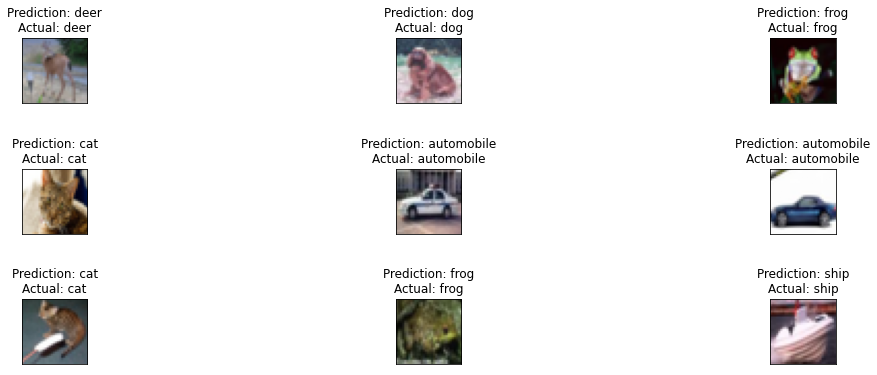

In [ ]:
#FINAL OBJECT DETECTION
fig, axs = plt.subplots(3, 3, figsize = (19,6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
            
    # plot the image
    axs[i].imshow(img)
    
# show the plot
plt.show()